# Открытие файлов

Для открытия файла, важно понимать как работает относительное расположение файла.

Как это понимать?

Дело в том что когда, мы запускаем какой либо .py файл, то место откуда производится запуск становится корневой папкой проекта.
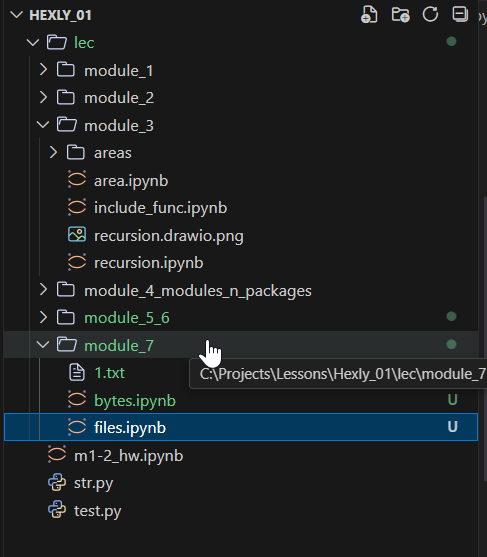

Наш исполняемый файл относительно общего проекта находится по расположению /lec/module_7/files.ipynb соответственно, когда мы запускаем этот рабочий файл(или .py файл по этому же расположению). Корневой папкой, является /module_7/ и мы можем видеть или работать только с теми файлами и папками которые видим. 


Для открытия файла используется специальная комманда open. Также если файл был открыт то обязательным правилом должно быть и его закрытие

In [48]:
filename = '1.txt' # так например мы можем указать просто имя файла на уровне нашего исполняемого 
file = open(filename)
print(f'Посмотрим что такое это наше file стало после open: {type(file)=}')
text_from_file = file.read()
file.close() # После того как были выполнены все действия файл нужно закрыть
print(text_from_file)

Посмотрим что такое это наше file стало после open: type(file)=<class '_io.TextIOWrapper'>
Some strings of text

Some strings of text2
Hello world


In [49]:
# print(file.read()) # Теперь при вызове метода read когда файл закрыт, невозможен т.к. файл закрыт

У нас есть три режима открытия файла: «r», «w» и «a». 
- «r» — это чтение (от слова «read»), 
- «w» — запись (от слова «write»),
-  «a» — добавление (от слова «append»). 

Нам достаточно запомнить эти три режима.

Есть несколько нюансов: режимы ограничивают то, что мы можем сделать с файлом. Например, при работе в Word или Excel вы, возможно, встречали предупреждение о том, что файл открыт только для чтения. Логика здесь примерно такая же: если мы открыли файл в режиме чтения, то нам доступно только ознакомление с содержимым этого файла. Нужно запомнить, что работа с файлом делится на три этапа:

1. Открытие файла;

2. Выполнение действия;

3. Закрытие файла.


Теперь файл открыли. Что мы хотим сделать? Для начала давайте посмотрим, что содержится в переменной «file». Запустим код и увидим специальный объект «TextIOWrapper», имя файла, режим открытия и кодировку «cp1252». Эта кодировка устанавливается по умолчанию при открытии файлов.

# Контекстный оператор with. 

Контекстный опратор -- это специальная конструкция(оператор) которая работает в рамках определенного блока кода. Внутри этого блока кода автоматически вызывается метод close() [При работе с файлами] для закрытия файла. Это позволяет избежать проблем с открытием и закрытием файлов вручную.


In [50]:
with open(filename, 'r') as file:
    print(file.read())

# print(file.read()) # Ошбика потому что файл закрыт после работы в блоке with

Some strings of text

Some strings of text2
Hello world


А что на счёт записи? При записи в файл, всё содержимое файла удаляется и после метод write(*text*) происходит запись текста в файл

In [51]:
# запуск только в .py файле
# filename = 'lec/module_7/1.txt' # Выставляем общий путь относительно ПРОЕКТА а не запускаемого файла
filename = 'C:/Projects/Lessons/Hexly_01/lec/module_7/1.txt' # Выставим абсолютный путь к файлу, или другими полный путь от корня системы
with open(filename, 'w') as file:
    file.write('Some strings of text\n\nSome strings of text2')

Режим 'a' - режим дозаписи в файл без удаление содержания. Работает на тех же методах что и модификатор записи 'w' но в отличии от w не стирает данные файла перед добавлением. От слова (a)ppend

In [52]:
with open(filename, 'a') as file:
    print(file.write('\nHello world'))
    

12


### Какие ещё есть режимы ?

'x' - создает новый файл и открывает файл для записи (если файл уже существует, то будет ошибка)

'b' - модификатор для открытия в двоичном (бинарном) формате

't' - text (запуск как текста (стандарт))

'+' - для открытия файла и дозаписи(чтение + дозапись)

### Если файла не существует на момент работы с ним, то режимы x, w, a будут его создавать

In [53]:
filename = '2.txt'
with open(filename, 'a') as file:
    file.write('Какая то информация о файле')


Файл создался, но его содержимое нечитабельно

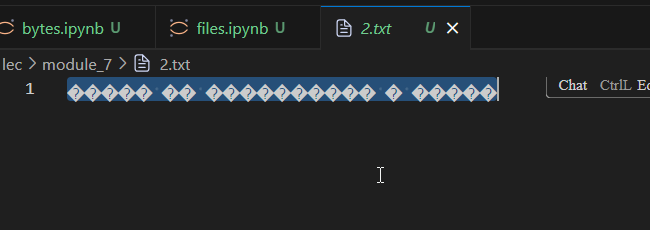

Почему так произошло ?
Дело в то что при работе с файлами, в стандартном виде, мы работаем с текстом формата ASCII (аски-2, асции и т.д.). То есть в диапазоне байт от 0 до 255. Как мы заметили ранее, это один байт информации, в отличии от кириллицы которая попадает в алфавит из 2 байтов. Соответственно, когда создается или записывается, перезаписываети, дозаписывается файл в стандартном формате его алфавит не превышает 255 заданных символов.

In [54]:
filename = '2.txt'
with open(filename, 'a') as file:
    file.write('Какая то информация о файле\n')


Как это исправить?

In [55]:
filename = '2.txt'
with open(filename, 'a', encoding='utf-8') as file:
    file.write('Какая то информация о файле\n')


In [56]:
with open(filename) as file:
    file_msg = file.read()

result = ''

for char in file_msg:
    if char in ['\n', ' ']:
       result += char
       continue
    result += f'{ord(char)} ' 
print(result)

1056 1119 1057 1026 1056 1105 1056 1030 1056 181 1057 8218  1056 1112 1056 1105 1057 1026 1050 1072 1082 1072 1103  1090 1086  1080 1085 1092 1086 1088 1084 1072 1094 1080 1103  1086  1092 1072 1081 1083 1077 1050 1072 1082 1072 1103  1090 1086  1080 1085 1092 1086 1088 1084 1072 1094 1080 1103  1086  1092 1072 1081 1083 1077 
1056 1113 1056 176 1056 1108 1056 176 1057 1039  1057 8218 1056 1109  1056 1105 1056 1029 1057 8222 1056 1109 1057 1026 1056 1112 1056 176 1057 8224 1056 1105 1057 1039  1056 1109  1057 8222 1056 176 1056 8470 1056 187 1056 181 



In [57]:
with open(filename, encoding='utf-8') as file:
    file_msg = file.read()

result = ''

for char in file_msg:
    if char in ['\n', ' ']:
       result += char
       continue
    result += f'{ord(char)} '

print(result)
print(file_msg)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xca in position 19: invalid continuation byte

## Бинарная запись файла

Режимы которые мы уже изучили можно комбинировать между собой, но только в тех случаях когда они не перекрывают друг друга. Например, если вы хотите записать данные в файл и затем продолжить работу с этим же файлом, вы можете использовать режим `a` (append). Но в случае когда нам нужно записать в бинарном формате, появляется дополнительный режим 'ab'. b сам по себе как модификатор существовать не может. 


- **В бинарном режиме отсутствует encoding аргумент**

In [38]:
filename = '1.txt'
with open(filename, 'rb') as file:
    file_msg = file.read()
print(file_msg)

b'Some strings of text\r\n\r\nSome strings of text2\r\nHello world\r\nHello world\r\nHello world\r\nHello world\r\nHello world\r\nHello world'


In [39]:
filename = '2.txt'
with open(filename, 'rb') as file:
    file_msg = file.read()
print(file_msg)

b'\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd \xef\xbf\xbd\xef\xbf\xbd \xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd \xef\xbf\xbd \xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\r\n\xd0\x9a\xd0\xb0\xd0\xba\xd0\xb0\xd1\x8f \xd1\x82\xd0\xbe \xd0\xb8\xd0\xbd\xd1\x84\xd0\xbe\xd1\x80\xd0\xbc\xd0\xb0\xd1\x86\xd0\xb8\xd1\x8f \xd0\xbe \xd1\x84\xd0\xb0\xd0\xb9\xd0\xbb\xd0\xb5\r\n'


In [41]:
filename = '2.txt'
with open(filename, 'wb') as file:
    file.write(b'Привет мир') # Записывать в b строку кириллицу по определению нельзя, так как поддерживатеся только ASCII

SyntaxError: bytes can only contain ASCII literal characters (3738788222.py, line 3)

Для того чтобы перевести в бинарный формат символы выходящие за границы алфавита ASCII нужно использовать метод <u>строк</u> encode()

In [42]:
filename = '2.txt'
with open(filename, 'wb') as file:
    file.write('Привет мир'.encode())

# Маркер(якорь) файла

Что это такое? Якорь(маркер файла) - это определенный механизм, который работает в рамках запущенного файла. И показывает байт-позицию в файле на которой действие остановилось.

In [67]:
filename = '1.txt'
file = open(filename, 'r')
# Считываем в первый раз, и получаем все содержимое
print(f'{file.read()=}')
# Считываем второй раз и получем пустую строку
print(f'{file.read()=}')
# На будующее проверим сколько весит сам конечный файл

file.close()

import os
print(f"Наш рабочий файл, весит: {os.path.getsize(filename)} байт(а).")

file.read()='Some strings of text\n\nSome strings of text2\nHello world'
file.read()=''
Наш рабочий файл, весит: 58 байт(а).


Как так вышло? Дело в том что наш файл содержит 58 символов, или 58 байт информации. Когда происходит первое чтение, якорь идет вместе с кажым байтом чтения, соответственно, когда мы доходим до конца файла, якорь останавливается на последнем БАЙТЕ файла.

In [70]:
filename = '1.txt'

with open(filename, 'r') as file:
    # Повторим все ещё раз
    print(f'{file.read()=}')
    # Но теперь давайте рассмотрим где якорь остановился для этого используется специальная функция tell()
    print(f'{file.tell()=}')

import os
print(f"Наш рабочий файл, весит: {os.path.getsize(filename)} байт(а).")

file.read()='Some strings of text\n\nSome strings of text2\nHello world'
file.tell()=58
Наш рабочий файл, весит: 58 байт(а).


Метод tell() - Показывает на каком месте находится якорь в открытой области файла
 

Но также как считывать местоположения якоря, мы можем и менять на тот байт который нам нужен

Повторим ту процедуру, которую пытались выполнить ранее. (Повторное чтение)

In [72]:
filename = '1.txt'

with open(filename, 'r') as file:
    print(f'{file.read()=}')
    print(f'{file.tell()=} байт-позиция')
    file.seek(0) # Перемещаем якорь в начало файла
    print(f'{file.tell()=} байт-позиция в файле после seek(0)')
    print(f'{file.read()=}')
    print(f'{file.tell()=} байт-позиция')
    

import os
print(f"Наш рабочий файл, весит: {os.path.getsize(filename)} байт(а).")

file.read()='Some strings of text\n\nSome strings of text2\nHello world'
file.tell()=58 байт-позиция
file.tell()=0 байт-позиция в файле после seek(0)
file.read()='Some strings of text\n\nSome strings of text2\nHello world'
file.tell()=58 байт-позиция
Наш рабочий файл, весит: 58 байт(а).


Давайте рассмотрим файл в котором у нас есть кириллица. Не просто так, я делал акцент на то что мы читаем именно БАЙТЫ и работаем с ними. Так например ASCII символ весит 1 байт и мы можем с ним работать как с индексами, но при работе с кириллицей или любым другим алфавитом количество байт уже больше 1 байта. 

Для начала давайте рассмотрим вес каждого файла по отдельности

In [82]:
filename = '2.txt'
import os, sys
print(f"Наш рабочий файл {filename}, весит: {os.path.getsize(filename)} байт(а).")

with open(filename, 'r', encoding='utf-8') as file:
   file_text = file.read()

for char in file_text:
    print(f'{char} = {len(char.encode())} байт(а)') 

    


Наш рабочий файл 2.txt, весит: 52 байт(а).
К = 2 байт(а)
а = 2 байт(а)
к = 2 байт(а)
а = 2 байт(а)
я = 2 байт(а)
  = 1 байт(а)
т = 2 байт(а)
о = 2 байт(а)
  = 1 байт(а)
и = 2 байт(а)
н = 2 байт(а)
ф = 2 байт(а)
о = 2 байт(а)
р = 2 байт(а)
м = 2 байт(а)
а = 2 байт(а)
ц = 2 байт(а)
и = 2 байт(а)
я = 2 байт(а)
  = 1 байт(а)
о = 2 байт(а)
  = 1 байт(а)
ф = 2 байт(а)
а = 2 байт(а)
й = 2 байт(а)
л = 2 байт(а)
е = 2 байт(а)

 = 1 байт(а)


# Методы файла

Помимо режимов чтения, каждый открытый файл имеет свои методы, связанные с открываемым режимом

In [87]:
filename = '1.txt'
with open(filename, 'r', encoding='utf-8') as file:
   print(f'{file.read()=}') # Стандартное чтение файла, где файл будет прочитан и переведен в общую строку
   file.seek(0)
   
   print(f"{file.readline()}") # Метод который считывает по одной строке за применение
   file.seek(0)
   
   print(f"{file.readlines()}") # Метод который считывает все строки, но выдает их списком
   file.seek(0)
   
   print(f"{file.readable()}") # Метод который проверяет доступность файла для чтения (работает во всех режимах)
   file.seek(0)
   
   print(f"{file.buffer}") # Это текущий файл который хранится во временном буфере
    
   print(f"{file.writable()}") # Метод который проверяет доступность файла для записи (работает везде)
   

file.read()='Some strings of text\n\nSome strings of text2\nHello world'
Some strings of text

['Some strings of text\n', '\n', 'Some strings of text2\n', 'Hello world']
True
<_io.BufferedReader name='1.txt'>
False


Что делает режим +, позволяет помимо базовых действий (чтения) делать запись, причем запись будет начинаться с того места где стоит якорь. При этом всем запись происходит как перезаписывание от какого либо байта

In [95]:
with open(filename, 'r+', encoding='utf-8') as file:
   print(f'{file.readable()=}') 
   print(f'{file.writable()=}') 
   file.seek(os.path.getsize(filename)) # Перенос на последний байт файла
   file.write('\nSome action')


file.readable()=True
file.writable()=True
